# Tutorial 3

## Structure of Project Reports

In this class, reports are not simply a printout of the numerical results or bullet point answers, but rather a formalized report (written in proper academic English) containing:
- an abstract -- approximately 5 sentences that summarize the key findings of your report
- an introduction -- a description of the problem of interest and how the report is structured
- your work -- explanation of the model setup, description of the methodology/theory, introduction of the notation, etc.
- experiments -- a discussion/interpretation of the results with figures produced in Python
- a conclusion -- summary of the whole report that highlights the key findings
- references (if needed) -- include citations/references for pieces of work that are not yours

While writing your report, particular attention should be dedicated to the following:
- Organize your work in sections and subsections with titles
- **Keep only the essential material and make it self-contained!**
- Use an active language (i.e. no "we will [...]")
- Use [transitional words](https://github.com/acoache/sta2536/blob/main/2022/transitional-words.pdf) and [academic hedging](https://github.com/acoache/sta2536/blob/main/2022/hedging-tip-sheet.pdf)
- Show derivations of the key steps

For all the figures and tables generated with Python, make sure to:
- Keep only significant digits
- Add interpretations and/or explanations
- Write appropriate labels
- Use easy-to-read font sizes and line widths

## Hidden Markov Models (HMM)

Suppose we have latent variables $Z_{t} \in \{1,\ldots,k\}$, and observable variables $X_{t} \in \mathcal{X}$. Let

- $\pi_{i} = P(Z_1 = i)$, initial probability
- $A_{ij} = P(Z_{t+1} = j \ | \ Z_{t} = i)$, transition probabilities
- $\psi_{i}(x) = P(X_t = x \ | \ Z_{t} = i)$, emission probabilities

The log-likelihood is given by
\begin{equation*}
\begin{split}
    \ell(Z;\Theta) &= \sum_{i=1}^{k} \log \pi_{i} \; I_{Z_1 = i} \\
    &\quad + \sum_{t=1}^{n} \sum_{i=1}^{k} \log \psi_i(x_{t}) \; I_{Z_t = i} \\
    &\quad + \sum_{t=1}^{n} \sum_{i=1}^{k} \log A_{ij} \; I_{Z_t = i} \, I_{Z_{t+1} = j}.
\end{split}
\end{equation*}

We can use the expectation-maximization to find parameters in the model, using the so-called **forward-backward algorithm**.

#### Example: HMM with Gaussian emissions

We reproduce the results from [STA2536-HiddenMarkovModel Python notebook by Sebastian Jaimungal](https://github.com/sebjai/STA2536/blob/master/HMM/Hidden%20Markov%20Model.ipynb) using the [hmmlearn](https://hmmlearn.readthedocs.io/en/latest/) library.

In [1]:
# import Python libraries
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from hmmlearn import hmm # you might need to pip install hmmlearn...

In [2]:
def SimData(pi, A, mu, sigma, Nsims, Nsteps):
    
    Y = np.zeros((Nsims,Nsteps)).astype(int)
    X = np.zeros((Nsims,Nsteps))
    
    cs_A = np.cumsum(A,axis=1)
    cs_pi = np.cumsum(pi)
    
    # draw from the prior
    for i in range(Nsims):
        Y[i,0] = np.sum(np.random.rand() > cs_pi)
        
    for t in range(Nsteps):

        # generate X
        X[:,t] = mu[Y[:,t]] + sigma[Y[:,t]] * np.random.randn(Nsims)
        
        # update Y
        if t < Nsteps-1:
            # generate uniforms and duplicate across columns
            U = np.matlib.repmat(np.random.rand(Nsims,1),1,pi.shape[0])
            
            # update Y by selecting appropriate row and summing number of times 
            # that row crosses a threshold
            Y[:,t+1] = np.sum(U > cs_A[Y[:,t],:], axis=1)
        
    return X.T, Y

In [3]:
#### Example with 2 components
# pi = np.array([0.3, 0.7])
# A = np.array([[0.8, 0.2],[0.4,0.6]])
# mu = np.array([-1,  1])
# sigma = np.array([1,2])

#### Example with 3 components
pi = np.array([0.25, 0.65, 0.1])
A = np.array([[0.7,0.2,0.1],[0.3,0.5,0.2],[0.15,0.25,0.6]])
mu = np.array([-1, 0, 1])
sigma = np.array([1, 0.5, 2])

Nsims = 100
Nsteps = 100
X, Y = SimData(pi, A, mu, sigma, Nsims, Nsteps) 

If we only want the final parameter estimates of the HMM, we specify the total number of iterations directly in the function.

In [4]:
model_train = hmm.GaussianHMM(n_components=3, n_iter=500, tol=1e-9, verbose=True)

reshape_X = X.transpose().reshape(-1,1)
reshape_lengths = [Nsteps for i in range(Nsims)]

model_train.fit(reshape_X, lengths=reshape_lengths)

         1      -20637.6843             +nan
         2      -17782.4922       +2855.1922
         3      -17594.5246        +187.9675
         4      -17505.6843         +88.8403
         5      -17452.9752         +52.7091
         6      -17418.5440         +34.4312
         7      -17395.0014         +23.5426
         8      -17378.5560         +16.4454
         9      -17366.9411         +11.6148
        10      -17358.6635          +8.2776
        11      -17352.6980          +5.9655
        12      -17348.3377          +4.3603
        13      -17345.0980          +3.2396
        14      -17342.6476          +2.4504
        15      -17340.7582          +1.8894
        16      -17339.2710          +1.4873
        17      -17338.0736          +1.1974
        18      -17337.0859          +0.9877
        19      -17336.2503          +0.8356
        20      -17335.5250          +0.7253
        21      -17334.8799          +0.6452
        22      -17334.2928          +0.5871
        23

       194      -17050.7213          +0.0393
       195      -17050.6827          +0.0385
       196      -17050.6450          +0.0377
       197      -17050.6080          +0.0370
       198      -17050.5718          +0.0362
       199      -17050.5364          +0.0355
       200      -17050.5017          +0.0347
       201      -17050.4677          +0.0340
       202      -17050.4344          +0.0333
       203      -17050.4018          +0.0326
       204      -17050.3699          +0.0319
       205      -17050.3387          +0.0312
       206      -17050.3081          +0.0306
       207      -17050.2782          +0.0299
       208      -17050.2489          +0.0293
       209      -17050.2202          +0.0287
       210      -17050.1922          +0.0280
       211      -17050.1648          +0.0274
       212      -17050.1379          +0.0268
       213      -17050.1117          +0.0262
       214      -17050.0860          +0.0257
       215      -17050.0609          +0.0251
       216

       388      -17049.1475          +0.0001
       389      -17049.1474          +0.0001
       390      -17049.1473          +0.0001
       391      -17049.1472          +0.0001
       392      -17049.1472          +0.0001
       393      -17049.1471          +0.0001
       394      -17049.1470          +0.0001
       395      -17049.1470          +0.0001
       396      -17049.1469          +0.0001
       397      -17049.1469          +0.0001
       398      -17049.1468          +0.0001
       399      -17049.1467          +0.0001
       400      -17049.1467          +0.0001
       401      -17049.1466          +0.0001
       402      -17049.1466          +0.0000
       403      -17049.1465          +0.0000
       404      -17049.1465          +0.0000
       405      -17049.1465          +0.0000
       406      -17049.1464          +0.0000
       407      -17049.1464          +0.0000
       408      -17049.1463          +0.0000
       409      -17049.1463          +0.0000
       410

GaussianHMM(n_components=3, n_iter=500, tol=1e-09, verbose=True)

In [5]:
print(model_train.startprob_)
print(model_train.transmat_)
print(model_train.means_.squeeze())
print(np.sqrt(model_train.covars_.squeeze()))

[0.22457508 0.69814229 0.07728263]
[[0.69038509 0.21200332 0.09761158]
 [0.27186683 0.50631133 0.22182184]
 [0.17092104 0.23542568 0.59365328]]
[-1.06868079  0.0306446   0.99303877]
[0.95899386 0.49278193 1.98138363]


If we want to see the evolution of the parameter estimates, we must run the fitting procedure for a single iteration and save the outputs. Here is an example embedded in a custom function:

In [6]:
def trainHMM(K, n_iter=100):
    model_train = hmm.GaussianHMM(n_components=K, n_iter=1, tol=1e-9, verbose=False, init_params="")

    reshape_X = X.transpose().reshape(-1,1)
    reshape_lengths = [Nsteps for i in range(Nsims)]
    
    ell = []
    pi = []
    A = []
    mu = []
    sigma = []

    for i in range(n_iter):
        model_train.fit(reshape_X, lengths=reshape_lengths)

        ell.append(model_train.score(reshape_X, lengths=reshape_lengths))
        pi.append(model_train.startprob_)
        A.append(model_train.transmat_)
        mu.append(model_train.means_.squeeze())
        sigma.append(np.sqrt(model_train.covars_.squeeze()))
        
        if (i % 25) == 0:
            print('iter = ' + str(i))
            print(model_train.startprob_)
            print(model_train.transmat_)
            print(model_train.means_)
            print(model_train.covars_)
            print("***")
        
    return ell, pi, A, mu, sigma, model_train

In [7]:
ell_est, pi_est, A_est, mu_est, sigma_est, model = trainHMM(K=3, n_iter=250)

iter = 0
[0.05874454 0.00481982 0.93643564]
[[0.39501004 0.29963909 0.30535087]
 [0.10415375 0.87228793 0.02355831]
 [0.00114945 0.81323744 0.18561311]]
[[-1.21066364]
 [-0.24871508]
 [ 2.2276573 ]]
[[[1.35139189]]

 [[1.42600848]]

 [[3.5796313 ]]]
***
iter = 25
[0.05270903 0.89414536 0.05314561]
[[0.58824079 0.33083541 0.0809238 ]
 [0.17110483 0.69390149 0.13499368]
 [0.02919303 0.4098128  0.56099417]]
[[-1.35436639]
 [-0.21063715]
 [ 1.28027807]]
[[[1.01822201]]

 [[0.62941179]]

 [[4.06880929]]]
***
iter = 50
[0.15034334 0.7748595  0.07479715]
[[0.56565553 0.34560139 0.08874308]
 [0.2511185  0.55088322 0.19799828]
 [0.112461   0.28810287 0.59943613]]
[[-1.35598899]
 [-0.02023759]
 [ 0.94677838]]
[[[0.69698047]]

 [[0.30859074]]

 [[4.04053433]]]
***
iter = 75
[0.17103314 0.75072818 0.07823868]
[[0.59522003 0.30928663 0.09549334]
 [0.26194183 0.52949628 0.20856189]
 [0.13224469 0.26980188 0.59795344]]
[[-1.2797628 ]
 [ 0.0039405 ]
 [ 0.93584393]]
[[[0.73957508]]

 [[0.28017225]]

 [

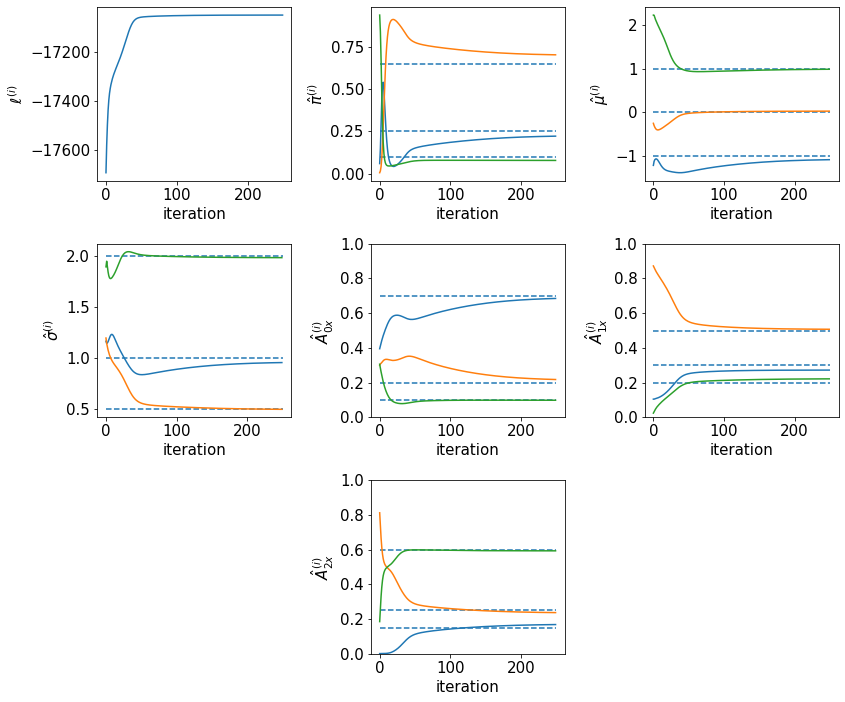

In [11]:
plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 15})
plt.subplots_adjust(wspace = 0.5)

plt.subplot(3,3,1)
plt.plot(ell_est)
plt.xlabel('iteration')
plt.ylabel('$\ell^{(i)}$')

plt.subplot(3,3,2)
plt.plot(pi_est)
plt.hlines(pi,0, len(ell_est),linestyles='dashed')
plt.xlabel('iteration')
plt.ylabel('$\hat{\pi}^{(i)}$')

plt.subplot(3,3,3)
plt.plot(mu_est)
plt.hlines(mu,0, len(ell_est),linestyles='dashed')
plt.xlabel('iteration')
plt.ylabel('$\hat{\mu}^{(i)}$')

plt.subplot(3,3,4)
plt.plot(sigma_est)
plt.hlines(sigma,0, len(ell_est),linestyles='dashed')
plt.xlabel('iteration')
plt.ylabel('$\hat{\sigma}^{(i)}$')


plt.subplot(3,3,5)
plt.plot(np.array(A_est)[:,0,0])
plt.hlines(A[0,0],0, len(ell_est),linestyles='dashed')
plt.plot(np.array(A_est)[:,0,1])
plt.hlines(A[0,1],0, len(ell_est),linestyles='dashed')
plt.plot(np.array(A_est)[:,0,2])
plt.hlines(A[0,2],0, len(ell_est),linestyles='dashed')
plt.ylim(0,1)
plt.xlabel('iteration')
plt.ylabel('$\hat{A}_{0x}^{(i)}$')

plt.subplot(3,3,6)
plt.plot(np.array(A_est)[:,1,0])
plt.hlines(A[1,0],0, len(ell_est),linestyles='dashed')
plt.plot(np.array(A_est)[:,1,1])
plt.hlines(A[1,1],0, len(ell_est),linestyles='dashed')
plt.plot(np.array(A_est)[:,1,2])
plt.hlines(A[1,2],0, len(ell_est),linestyles='dashed')
plt.ylim(0,1)
plt.xlabel('iteration')
plt.ylabel('$\hat{A}_{1x}^{(i)}$')

plt.subplot(3,3,8)
plt.plot(np.array(A_est)[:,2,0])
plt.hlines(A[2,0],0, len(ell_est),linestyles='dashed')
plt.plot(np.array(A_est)[:,2,1])
plt.hlines(A[2,1],0, len(ell_est),linestyles='dashed')
plt.plot(np.array(A_est)[:,2,2])
plt.hlines(A[2,2],0, len(ell_est),linestyles='dashed')
plt.ylim(0,1)
plt.xlabel('iteration')
plt.ylabel('$\hat{A}_{2x}^{(i)}$')

plt.tight_layout()
plt.show()

Let us compute the BIC criterion for all models trained with the EM algorithm. Recall that $\text{BIC}(M_j) = -\ell_{j}(\hat{\theta}_{j}) + \frac{1}{2}d_j \log(n)$.

In [9]:
def BIC(ell, K, n):
    probs = K - 1
    transitions = K * (K-1)
    emissions = 2 * K
    
    # number of free parameters
    return -ell + 0.5*(probs + transitions + emissions)*np.log(n)

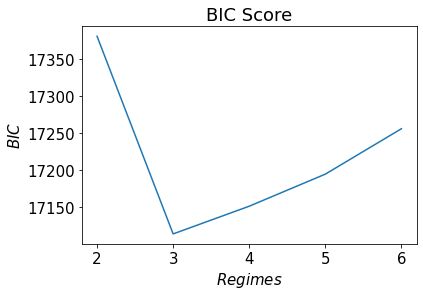

In [10]:
Kfitmax = 6
bic = np.zeros((Kfitmax,1))
ll = np.zeros((Kfitmax,1))

# fitting the parameters using Kfit classes
for Kfit in range (2,Kfitmax+1):
    model_train = hmm.GaussianHMM(n_components=Kfit, n_iter=300, tol=1e-9, verbose=False)
    model_train.fit(reshape_X, lengths=reshape_lengths)
    
    # get log-likelihood and the BIC criterion
    ll[Kfit-1] = model_train.score(reshape_X, lengths=reshape_lengths)
    bic[Kfit-1] = BIC(ll[Kfit-1], Kfit, Nsims*Nsteps)
    
    
# plot the BIC score for model selection
fig, axes = plt.subplots()
axes.plot(np.linspace(2,Kfitmax,Kfitmax-1),bic[1:Kfitmax])
axes.set_xlabel(r'$Regimes$')    
axes.set_ylabel(r'$BIC$')
axes.set_title('BIC Score')
plt.show()